# **Research Question:**
Why is the validity of Fake News difficult to determine?

# **Step 1: Getting the data**

*   Real news articles obtained from The Guardian
(https://content.guardianapis.com)
*   Fake news articles obtained from Reddit using web scraping (https://www.reddit.com/r/TheOnion/)





In [0]:
import pandas as pd
from IPython.display import Image

pd.read_csv('https://raw.githubusercontent.com/guneetskohli/DATA301/master/news_with_len.csv').head()

,Unnamed: 0,title,url,content,fake,title_len,content_len
0,0,Biden Wondering Where All This Support Was Whe...,https://politics.theonion.com/biden-wondering-...,"WILMINGTON, DE—As the moderate wing of the Dem...",1,13,255
1,1,CDC Recommends Also Wearing Face Mask On Back ...,https://www.theonion.com/cdc-recommends-also-w...,ATLANTA—As documented cases of the disease inc...,1,16,288
2,2,"Orderly, dour, cowed: how my beloved Italy is ...",https://www.theguardian.com/world/2020/mar/15/...,Since the whole of Italy was put in quarantine...,0,11,2222
3,3,EPA Thugs Violently Beat Endangered Toad Who H...,https://www.theonion.com/epa-thugs-violently-b...,"BASTROP, TX—Bursting into the amphibian’s nati...",1,11,203
4,4,Coronavirus symptoms: what are they and should...,https://www.theguardian.com/world/2020/mar/15/...,What is Covid-19 – the illness that started in...,0,11,545


# **Step 2: Cleaning the data**

### Real News Data (The Guardian)

* Initially planned to web scrap real news from Reddit
* Difficult because there are many different news websites
* Some APIs only had title, URL, and maybe first couple of body's sentences
* The Guardian API had content, but limited us to 200 articles
* Only cleaning needed to be done was checking if the article had any content

### Fake News Data (Reddit)

* Web scraped articles from /r/TheOnion (Top of All Time)
* Not all articles were directly from The Onion (clickhole) - excluded to make scraping content easier
* Had to check if articles had content
* Some articles included the city and state that the news was relevant to, followed by a hyphen
* To make sure our machine learning wouldn't be affected by this (since it was only fake articles that had this) it had to be removed


In [0]:
pd.read_csv('https://raw.githubusercontent.com/guneetskohli/DATA301/master/filtered_news.csv').head()

,Unnamed: 0,title,url,content,fake,title_len,content_len
0,0,Sportless TV goes all nostalgic on a truly sur...,https://www.theguardian.com/sport/2020/mar/15/...,"So, the show doesn’t have to go on after all. ...",0,13,862
1,1,Nation Perplexed By 16-Year-Old Who Doesn’t Wa...,https://www.theonion.com/nation-perplexed-by-1...,Following her U.N. address about the existenti...,1,10,197
2,2,Inconsolable Jeff Sessions Tries To Commit Sui...,https://politics.theonion.com/inconsolable-jef...,Following months of bruising criticism from De...,1,10,129
3,3,Israel's opposition head Benny Gantz wins supp...,https://www.theguardian.com/world/2020/mar/15/...,Israeli political parties have backed the oppo...,0,10,1053
4,4,"‘No Way To Prevent This,’ Says Only Nation Whe...",https://www.theonion.com/no-way-to-prevent-thi...,In the days following a violent rampage in sou...,1,12,200


# **Step 3: Exploring the data**


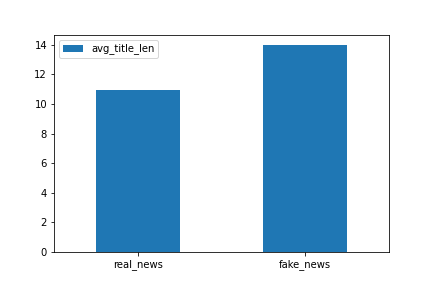

In [0]:
Image("https://raw.githubusercontent.com/guneetskohli/DATA301/master/title.png", unconfined=True)

If we look at the length of titles for real and fake news, they seem to have similar average length of titles. Thus we predict that it would be difficult for us to predict from the title if news is fake or not. 

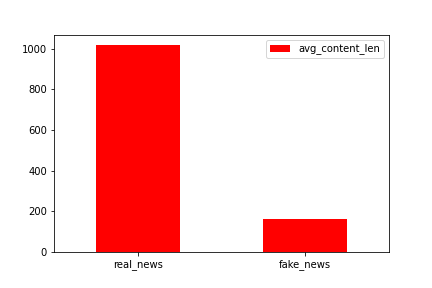

In [0]:
Image("https://raw.githubusercontent.com/guneetskohli/DATA301/master/content.png", unconfined=True)

If we look at the length of content for real and fake news, it seems that real news articles are usually longer that fake news articles. Thus we think that content will be more useful in determining if an article is real or not. 

# **Step 4: Machine Learning**

# Determining Classification Test Metrics for Different Models

* K-Neighbors Classifier
* Passive Aggressive Classifier
* Random Forest Classifier
* Linear SVC Classifier
* Logistic Regression Classifier

**Results of Various models**

In [19]:
pd.read_csv('https://raw.githubusercontent.com/guneetskohli/DATA301/master/df_results_final.csv')

,Unnamed: 0,Model,Features,Accuracy,Precision (Real),Precision (Fake),Recall (Real),Recall (Fake),F1 (Real),F1 (Fake)
0,0,KNeighbors,"['title', 'title_len']",0.569144,0.554409,0.600000,1.000000,0.076471,0.712937,0.133275
1,1,KNeighbors,"['content', 'content_len']",0.629505,1.000000,0.558746,0.305526,1.000000,0.460096,0.716460
2,2,KNeighbors,"['title', 'title_len', 'content', 'content_len']",0.645871,1.000000,0.571415,0.336053,1.000000,0.490978,0.726348
3,3,PassiveAggressive,"['title', 'title_len']",0.861411,0.865832,0.853553,0.882368,0.824510,0.868589,0.843934
4,4,PassiveAggressive,"['content', 'content_len']",0.945270,0.977709,0.907826,0.912368,0.965033,0.938496,0.943619
5,5,PassiveAggressive,"['title', 'title_len', 'content', 'content_len']",0.967117,0.989737,0.951954,0.943421,0.988235,0.965532,0.966177
6,6,RandomForest,"['title', 'title_len']",0.790390,0.754223,0.892892,0.928684,0.620261,0.813872,0.728621
7,7,RandomForest,"['content', 'content_len']",0.945270,0.995238,0.895506,0.891842,0.988235,0.927040,0.943136
8,8,RandomForest,"['title', 'title_len', 'content', 'content_len']",0.939715,0.989683,0.899553,0.896842,1.000000,0.934441,0.945493
9,9,LinearSVC,"['title', 'title_len']",0.853303,0.849287,0.866216,0.887632,0.813072,0.866479,0.836207


### From these results, we can determine the optimal set of features to train our models on.

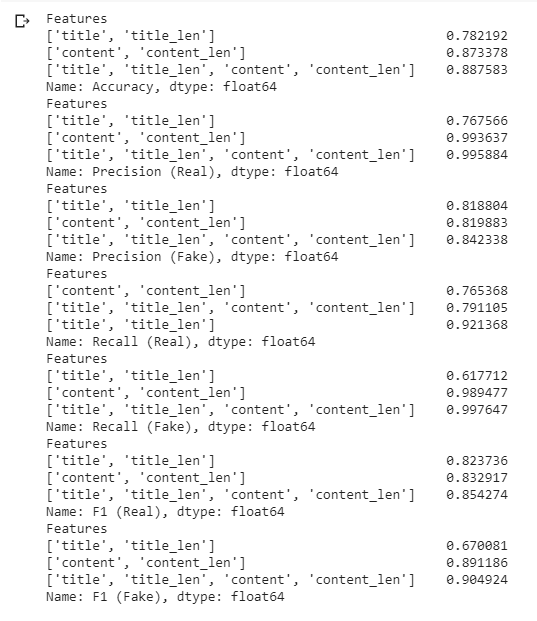

In [20]:
Image("https://raw.githubusercontent.com/guneetskohli/DATA301/master/screen4.png", unconfined=True)

### Next, we needed to tune the hyperparameters of each model to determine which model would be best used for fake news detection. We evaluated the hyperparameters on the average F1 score because accuracy would not have been a good test metric to evaluate them on due to the idea of false positives and false negatives. 

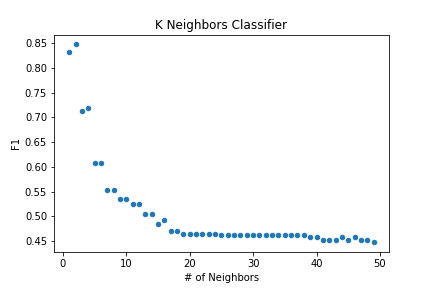

In [0]:
Image("https://raw.githubusercontent.com/guneetskohli/DATA301/master/KTuning.png", unconfined=True)

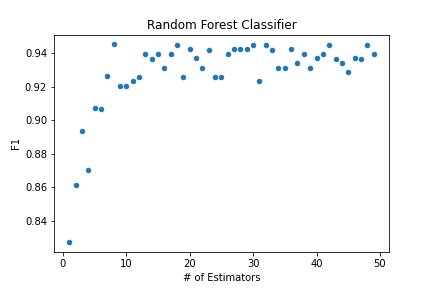

In [0]:
Image("https://raw.githubusercontent.com/guneetskohli/DATA301/master/RFTuning.png", unconfined=True)

### Now that we have the optimal set of features and hyperparameters, we can determine which classifier would be best used for fake news detection

In [0]:
pd.read_csv('https://raw.githubusercontent.com/guneetskohli/DATA301/master/df_best_overall_final.csv')

,Model,Accuracy,Precision (Real),Precision (Fake),Recall (Real),Recall (Fake),F1 (Real),F1 (Fake)
0,KNeighbors,0.849925,1.000000,0.770023,0.438158,0.988235,0.604979,0.862872
1,PassiveAggressive,0.964414,0.984474,0.939697,0.943421,0.982353,0.970532,0.963152
2,RandomForest,0.939865,0.995238,0.891779,0.891316,0.994118,0.929391,0.945968
3,LinearSVC,0.929054,1.000000,0.870326,0.861842,1.000000,0.924906,0.930083
4,LogisticRegression,0.956156,1.000000,0.918442,0.917368,1.000000,0.955515,0.956520


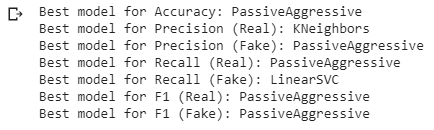

In [0]:
Image("https://raw.githubusercontent.com/guneetskohli/DATA301/master/screen3.png", unconfined=True)